# 양방향 연결 리스트(Doubly Linked Lists)

양방향(이중) 연결 리스트에서는 각 원소가 <u>자신의 이전 원소와 다음 원소의 주소</u>를 둘 다 들고 있다.    
단일 연결 리스트에서는 주어진 원소의 이전 원소가 무엇인지를 알 수 없는데 양방향 연결 리스트에서는 알 수 있다. 
- 단점: 원소가 가지고 있어야 하는 정보가 1개 더 추가되니 메모리를 더 쓰고 구현 또한 더 복잡하다.   
- 장점: 단방향 연결 리스트에 비해서 가지는 장점은, 데이터 원소들을 차례로 방문할 때, 앞에서부터 뒤로도 할 수 있지만 뒤에서부터 앞으로도 할 수 있다는 점(-> 원소 접근이 빨라짐). 실제로 컴퓨터 시스템의 주요 구성 요소의 하나인 운영체제 (operating system) 등에서는 리스트를 대상으로 앞/뒤로 왔다 갔다 하면서 작업을 행하는 일들이 빈번히 요구되고, 따라서 양방향 연결 리스트가 많이 이용되고 있다.

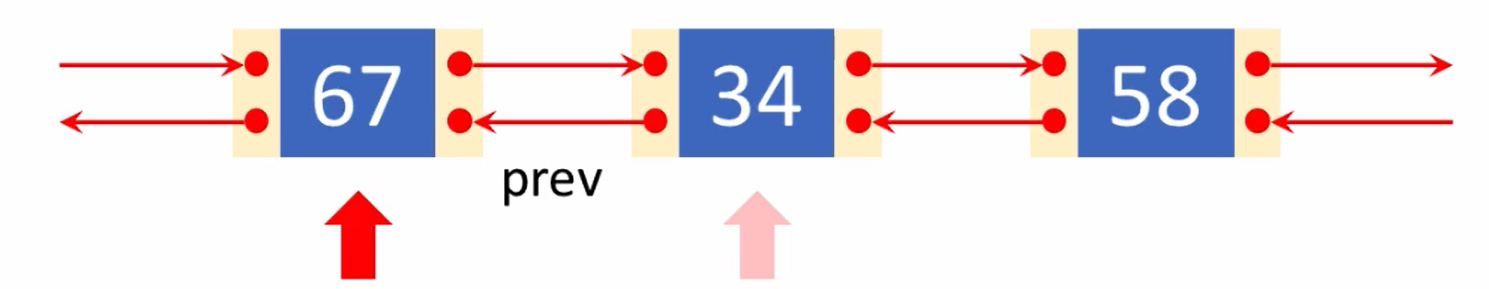

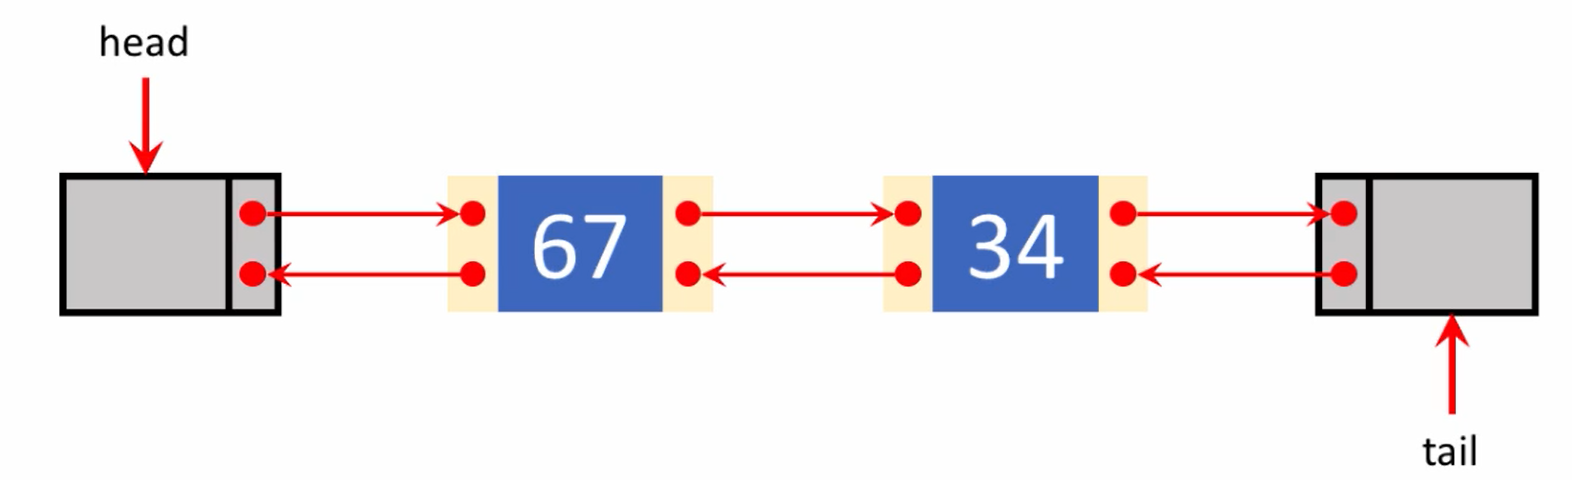
리스트의 처음과 끝에 dummy node를 두자!
-> 데이터를 담고 있는 node들은 모두 같은 모양

In [315]:
class Node:
    def __init__(self, item):
        self.data = item
        self.prev = None
        self.next = None

class DoublyLinkedList:
    def __init__(self):
        self.nodeCount = 0
        self.head = Node(None)
        self.tail = Node(None)
        self.head.prev = None
        self.head.next = self.tail
        self.tail.prev = self.head
        self.tail.next = None
    
    # 리스트 출력
    def __repr__(self):
        if self.nodeCount == 0:
            return 'LinkedList: empty'
        s = ''
        curr = self.head
        while curr.next.next:
            curr = curr.next
            s += repr(curr.data)
            if curr.next.next is not None:
                s += ' -> '
        return s
    
    # 길이 리턴
    def getLength(self):
        return self.nodeCount
    
    # 리스트 순회
    def traverse(self):
        result = []
        curr = self.head
        while curr.next.next:
            curr = curr.next
            result.append(curr.data)
        return result
    
    # 리스트 역순회
    def reverse(self):
        result = []
        curr = self.tail
        while curr.prev.prev:
            curr = curr.prev
            result.append(curr.data)
        return result
    
    # 특정 원소 참조
    def getAt(self, pos): # getAt(0) -> head
        if pos < 0 or pos > self.nodeCount:
            return None
        
        if pos > self.nodeCount // 2:
            i = 0
            curr = self.tail
            while i < self.nodeCount - pos + 1:
                curr = curr.prev
                i += 1
        else:
            i = 0
            curr = self.head
            while i < pos:
                curr = curr.next
                i += 1
        return curr
    
    # 원소의 삽입
    def insertAfter(self, prev, newNode): # prev가 가리키는 node의 다음에 newNode를 삽입하고 성공/실패에 따라 True/False를 리턴
        next = prev.next
        newNode.prev = prev
        newNode.next = next
        prev.next = newNode
        next.prev = newNode
        self.nodeCount += 1
        return True
    
    def insertBefore(self, next, newNode):
        prev = next.prev
        newNode.prev = prev
        newNode.next = next
        prev.next = newNode
        next.prev = newNode
        self.nodeCount += 1
        return True
    
    def insertAt(self, pos, newNode):
        if pos < 1 or pos > self.nodeCount + 1:
            return False
        prev = self.getAt(pos-1) # newNode가 삽입될 위치
        return self.insertAfter(prev, newNode)
    
    # 원소의 삭제
    def popAfter(self, prev): # prev의 다음 node를 삭제하고, 그 node의 data를 리턴
        curr = prev.next
        next = curr.next
        prev.next = next
        next.prev = prev
        self.nodeCount -= 1
        return curr.data
    
    def popBefore(self, next): # next의 이전에 있던 node를 삭제하고, 그 node의 data를 리턴
        curr = next.prev
        prev = curr.prev
        prev.next = next
        next.prev = prev
        self.nodeCount -= 1
        return curr.data
    
    def popAt(self, pos): # pos에 의해 지정되는 node를 삭제하고, 그 node의 data를 리턴
        if pos < 1 or pos > self.nodeCount:
            raise IndexError
        prev = self.getAt(pos-1)
        return self.popAfter(prev)
        
    def concat(self, L):
        self.nodeCount += L.nodeCount
        self.tail.prev.next = L.head.next
        L.head.next.prev = self.tail.prev
        self.tail = L.tail

In [316]:
a = Node(67)
b = Node(34)
c = Node(28)
L = DoublyLinkedList()

In [317]:
L.insertAt(1, a)
L.insertAt(2, b)
L

67 -> 34

In [318]:
L.insertAt(1, c)
L

28 -> 67 -> 34

In [319]:
L.popAt(3)

34

In [320]:
L

28 -> 67

---

---

# 야매 연결 리스트

🔥[바킹독님 강의 바로가기](https://www.youtube.com/watch?v=C6MX5u7r72E)   
**야매 연결 리스트**는 <u>원소를 배열로 관리하고 pre와 nxt에 이전/다음 원소의 포인터 대신 배열 상의 인덱스를 저장하는 방식</u>으로 구현한 연결 리스트. 메모리 누수의 문제 때문에 실무에서는 절대 쓸 수 없는 방식이지만 코딩테스트에서는 구현 난이도가 일반적인 연결 리스트보다 낮고 시간복잡도도 동일하기 때문에 애용하면 된다!(c++의 STL list가 파이썬에서는 없기 때문에 실제 코테에서는 구현보다 야매 연결리스트를 사용해보자)


- dat[i]: i번지 원소의 값
- pre[i]: i번지 원소에 대해 이전 원소의 인덱스
- nxt[i]: 다음 원소의 인덱스
- unused: 현재 사용되지 않는 인덱스, 즉 새로운 원소가 들어갈 수 있는 인덱스이고 원소가 추가된 이후에는 1씩 증가. 

pre나 nxt의 값이 -1이면 해당 원소의 이전/다음 원소가 존재하지 않는다는 의미    
그리고, 특별히 0번지는 연결 리스트의 시작 원소로 고정되어 있다. (달리 말하면 0번지는 값이 들어가지 않고 단지 시작점을 나타내기 위한 dummy node)

In [323]:
MX = 1000005
dat = [-1] * 1000005
pre = [-1] * 1000005
nxt = [-1] * 1000005
unused = 1


def insert(addr, num): # addr: 각 원소의 주소, 즉 배열 상에서 몇 번지인지를 의미
    global unused
    dat[unused] = num # data
    pre[unused] = addr # 이전 노드의 주소
    nxt[unused] = nxt[addr] # 다음 노드의 주소
    if nxt[addr] != -1:
        pre[nxt[addr]] = unused
    nxt[addr] = unused
    unused += 1

def erase(addr):
    nxt[pre[addr]] = nxt[addr]
    if nxt[addr] != -1:
        pre[nxt[addr]] = pre[addr]

def traverse():
    cur = nxt[0]
    while cur != -1:
        print(dat[cur], end= ' ')
        cur = nxt[cur]
    print('\n')
    
    
def insert_test():
    print('******* insert_test *******')
    insert(0, 10) # 10(address=1) <- 시작노드
    traverse()
    insert(0, 30) # 30(address=2) 10
    traverse()
    insert(2, 40) # 30 40(address=3) 10
    traverse()
    insert(1, 20) # 30 40 10 20(address=4)
    traverse()
    insert(4, 70) # 30 40 10 20 70(address=5)
    traverse()
    
    
def erase_test():
    print('******* erase_test *******')
    erase(1) # 30 40 20 70
    traverse()
    erase(2) # 40 20 70
    traverse()
    erase(4) # 40 70
    traverse()
    erase(5) # 40
    traverse()
    
    
insert_test()
erase_test()

******* insert_test *******
10 

30 10 

30 40 10 

30 40 10 20 

30 40 10 20 70 

******* erase_test *******
30 40 20 70 

40 20 70 

40 70 

40 



In [326]:
# BOJ 1406번: 에디터

mx = 1000005
data = [-1] * 1000005
pre = [-1] * 1000005
nxt = [-1] * 1000005


def insert(addr, num):
    global unused
    data[unused] = num # data
    pre[unused] = addr # 이전 노드의 주소
    nxt[unused] = nxt[addr] # 다음 노드의 주소
    if nxt[addr] != -1:
        pre[nxt[addr]] = unused
    nxt[addr] = unused # 이전 노드가 현재 노드를 가리키도록
    unused += 1

def erase(addr):
    nxt[pre[addr]] = nxt[addr]
    if nxt[addr] != -1:
        pre[nxt[addr]] = pre[addr]

def traversal():
    cur = nxt[0]
    while cur != -1:
        print(data[cur], end='')
        cur = nxt[cur]

cursor = 0
unused = 1

s = input().strip()
for i in s:
    insert(cursor, i)
    cursor += 1

for _ in range(int(input())):
    command = input().split()
    if command[0] == 'P':
        insert(cursor, command[1])
        cursor = nxt[cursor]
    elif command[0] == 'L':
        if pre[cursor] != -1:
            cursor = pre[cursor]
    elif command[0] == 'D':
        if nxt[cursor] != -1:
            cursor = nxt[cursor]
    else: # B
        if pre[cursor] != -1:
            erase(cursor)
            cursor = pre[cursor]

# print(data[:10])
# print(pre[:10])
# print(nxt[:10])

traversal()

abcd
3
P x
L
P y
abcdyx